## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Importing data from wikipedia</a> <br>
2. <a href="#item2">Getting neighbourhoods' location data</a><br>

3. <a href="#item3">Clustering the neighbourhoods</a><br>

3.1. <a href="#item4">Clustering withing Toronto</a><br>

4. <a href="#item5">Cluster examination</a><br>

5. <a href="#item6">Exploring Tornto</a>

  
</font>
</div>

<a id='item1'></a>

## 1. Importing data from wikipedia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
%matplotlib inline

Import the table using pandas

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header=0)[0] #download the table
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Drop rows without Borough data

In [3]:
df = df[df.Borough != "Not assigned"]  #get rid of entries without 'Borough'

In [4]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


Group same post codes

In [5]:
df = df.groupby('Postcode', as_index=False).agg(lambda x: ', '.join(set(x))) #group repeated postcodes

In [6]:
df.reset_index(drop=True, inplace=True) #clean up index
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Morningside, West Hill, Guildwood"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [7]:
df.shape

(103, 3)

<a id='item2'></a>

## 2. Getting neighbourhoods' location data

In [8]:
import geocoder # import geocoder
#doesnt work, returns None

Read csv with geo data

In [9]:
geo_data=pd.read_csv("Geospatial_Coordinates.csv") #had to download the file
geo_data.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


Add geo data to data frame. Rows in csv file correspond with data frame

In [10]:
df['Latitude']=geo_data['Latitude'].values #postal codes in data frame and geo data correspond to each other
df['Longitude']=geo_data['Longitude'].values

In [11]:
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Morningside, West Hill, Guildwood",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Ionview, Kennedy Park, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Oakridge, Golden Mile",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Scarborough Village West, Cliffside",43.716316,-79.239476
9,M1N,Scarborough,"Cliffside West, Birch Cliff",43.692657,-79.264848


<a id='item3'></a>

## 3. Clustering the neighbourhoods

Remove columns without numerical data

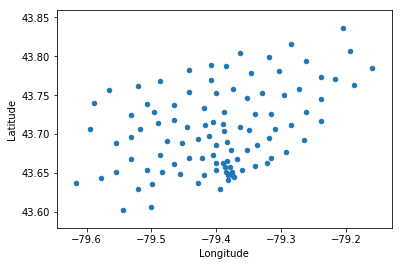

In [12]:
#prepare data for clustering, remove str columns
df_cluster = df.drop(['Postcode', 'Borough','Neighbourhood'],1)
df_cluster.plot(x='Longitude', y='Latitude',kind='Scatter') #plot to see if everything is alright

In [13]:
from sklearn.cluster import KMeans
import folium

In [14]:
kclusters = 10 #whole data frame
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)

In [15]:
kmeans.labels_[0:10] 

array([4, 4, 4, 4, 1, 1, 1, 1, 1, 1])

In [16]:
df.insert(0, 'Cluster Labels', kmeans.labels_)
df.head(10)

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,4,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,4,M1E,Scarborough,"Morningside, West Hill, Guildwood",43.763573,-79.188711
3,4,M1G,Scarborough,Woburn,43.770992,-79.216917
4,1,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,1,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,1,M1K,Scarborough,"Ionview, Kennedy Park, East Birchmount Park",43.727929,-79.262029
7,1,M1L,Scarborough,"Clairlea, Oakridge, Golden Mile",43.711112,-79.284577
8,1,M1M,Scarborough,"Cliffcrest, Scarborough Village West, Cliffside",43.716316,-79.239476
9,1,M1N,Scarborough,"Cliffside West, Birch Cliff",43.692657,-79.264848


In [17]:
# create map
latitude=43.651070
longitude=-79.347015
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighbourhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item4'></a>

## 3.1 Clustering within Toronto

Create new data frame confined within Toronto.

In [18]:
df_tor = df[df['Borough'].str.contains("Toronto")] #select rows containing 'Toronto'

Remove clusters from previous step.

In [19]:
df_tor.reset_index(drop=True, inplace=True)
df_tor = df_tor.drop('Cluster Labels',1)
df_tor.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


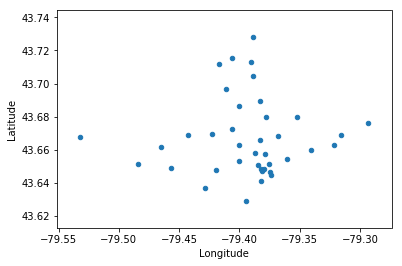

In [20]:
df_tor.plot(x='Longitude', y='Latitude', kind='scatter')

Prepare the data frame for clustering.

In [21]:
df_torClus= df_tor.drop(['Postcode', 'Borough', 'Neighbourhood'], 1) #prepare for clustering
df_torClus.head()

,Latitude,Longitude
0,43.676357,-79.293031
1,43.679557,-79.352188
2,43.668999,-79.315572
3,43.659526,-79.340923
4,43.728020,-79.388790


Divide the post codes into 4 clusters to see if boroughs will match.

In [22]:
kclusters = 4 #new clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_torClus)
df_tor.insert(0, 'Cluster Labels', kmeans.labels_) #merge the data with colusters
df_tor.head()

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,2,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,2,M4M,East Toronto,Studio District,43.659526,-79.340923
4,3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [23]:
# create map
latitude=43.651070
longitude=-79.347015
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Neighbourhood'], df_tor['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 4. Cluster examination


Cluster 1

In [24]:
df_tor.head() 

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,2,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,2,M4M,East Toronto,Studio District,43.659526,-79.340923
4,3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [25]:
df_tor.loc[df_tor['Cluster Labels'] == 0]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
10,0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
11,0,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
12,0,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
13,0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
14,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
16,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
17,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
18,0,M5H,Downtown Toronto,"Richmond, King, Adelaide",43.650571,-79.384568
19,0,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752


Cluster 2

In [26]:
df_tor.loc[df_tor['Cluster Labels'] == 1]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
31,1,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
34,1,M6P,West Toronto,"The Junction South, High Park",43.661608,-79.464763
35,1,M6R,West Toronto,"Roncesvalles, Parkdale",43.648960,-79.456325
36,1,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450
38,1,M9A,Downtown Toronto,Queen's Park,43.667856,-79.532242


Cluster 3

In [27]:
df_tor.loc[df_tor['Cluster Labels'] == 2]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,2,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,2,M4M,East Toronto,Studio District,43.659526,-79.340923
37,2,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558


Cluster 4

In [28]:
df_tor.loc[df_tor['Cluster Labels'] == 3]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
4,3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,3,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,3,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,3,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,3,M4T,Central Toronto,"Summerhill East, Moore Park",43.689574,-79.383160
9,3,M4V,Central Toronto,"South Hill, Summerhill West, Rathnelly, Deer P...",43.686412,-79.400049
22,3,M5N,Central Toronto,Roselawn,43.711695,-79.416936
23,3,M5P,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307


k-means clustering has quite succesfully divided postcodes into apropriate boroughs.

<a id='item6'></a>

## 5. Exploring Toronto

Preparing the foursquare creditails.

In [29]:
CLIENT_ID = 'JQYNPSOQXI12NK311020I2K4FAKMKEDV25CMLKTGSEUEVMUR' # your Foursquare ID
CLIENT_SECRET = 'XRECAKXLEOK324BN2Z3KDYNK1NBJ3UDYYS45PQAJ2LIM0BFX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JQYNPSOQXI12NK311020I2K4FAKMKEDV25CMLKTGSEUEVMUR
CLIENT_SECRET:XRECAKXLEOK324BN2Z3KDYNK1NBJ3UDYYS45PQAJ2LIM0BFX


Define the function for getting nearby venues.

In [30]:
LIMIT= 100
radius= 200
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get venues in Toronto.

In [32]:
toronto_venues = getNearbyVenues(names=df_tor['Borough'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']
                                  )

East Toronto
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
West Toronto
West Toronto
West Toronto
West Toronto
West Toronto
West Toronto
East Toronto
Downtown Toronto


In [33]:
print(toronto_venues.shape)
toronto_venues.head()

(1676, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East Toronto,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,East Toronto,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,East Toronto,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,East Toronto,43.676357,-79.293031,Domino's Pizza,43.679058,-79.297382,Pizza Place
4,East Toronto,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


Check how many unique categories are there.

In [35]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 230 uniques categories.


One hot encoding the venues data frame, add it to data frame.

In [43]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
toronto_onehot.shape

(1676, 230)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [38]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Central Toronto,0.009009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018018,...,0.000000,0.000000,0.018018,0.009009,0.000000,0.009009,0.000000,0.009009,0.000000,0.000000
1,Downtown Toronto,0.002346,0.000782,0.000782,0.000782,0.000782,0.001564,0.000782,0.001564,0.011728,...,0.000782,0.000000,0.000782,0.000782,0.002346,0.011728,0.001564,0.005473,0.007037,0.000782
2,East Toronto,0.024590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024590,...,0.000000,0.008197,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.008197,0.000000
3,West Toronto,0.018293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018293,0.000000,0.012195,0.006098,0.000000


In [39]:
toronto_grouped.shape

(4, 230)

Function for sorting the venues in descending order.

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Data frame displaying top 10 venues for each neighbourhoods.

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Sandwich Place,Pizza Place,Park,Café,Dessert Shop,Clothing Store,Restaurant,Sushi Restaurant,Pub
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Italian Restaurant,Bakery,Hotel,Japanese Restaurant,Park,Bar,Steakhouse
2,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Brewery,Pizza Place,Café,Yoga Studio,Pub,Restaurant
3,West Toronto,Bar,Café,Coffee Shop,Italian Restaurant,Bakery,Restaurant,Pizza Place,Music Venue,Park,Mexican Restaurant
